In [1]:
from ggplot import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

C:\Users\PhD\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\PhD\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
EC_metagenome = pd.read_csv("EC_metagenome_out/pred_metagenome_unstrat.tsv", sep="\t", header=0, index_col=1)
mapping = pd.read_csv("mapping_file_wo_controls.tab", sep="\t", header=0, index_col=0)

In [3]:
EC_metagenome.drop("function", inplace=True, axis=1)

In [4]:
metagenome_t = EC_metagenome.T

In [5]:
t_samples_df = mapping[mapping.Phenotype == "T"]
t_samples_list = t_samples_df.index.tolist()
metagenome_t['label'] = np.where(metagenome_t.index.isin(t_samples_list), "T", "NT")

In [6]:
X = metagenome_t.drop('label', axis=1)
y = metagenome_t['label']
print(X.shape)
print(y.shape)

(103, 1505)
(103,)


In [200]:
# pca 
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

In [201]:
pca_df = pd.DataFrame(pca_result, columns=['PCA-1', 'PCA-2', 'PCA-3'], index=X.index)
pca_df['label'] = y

In [202]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.68757742  0.15963952  0.0485023 ]


In [209]:
pca_plot = ggplot(pca_df, aes(x='PCA-1', y='PCA-2', color='label') ) \
        + geom_point(size=100,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by class")
pca_plot
ggplot.save(pca_plot, "pca_combined_cc.png", width=10, height=10)

In [204]:
# tSNE of principal components
pca_tsne = pca_df.loc[:, :'PCA-3'].values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000, init='random', random_state=42)
tsne_results = tsne.fit_transform(pca_tsne)

[t-SNE] Computing 102 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.000s...
[t-SNE] Computed neighbors for 103 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 18071.317384
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.604691
[t-SNE] Error after 1350 iterations: 0.096052


In [210]:
df_tsne = pca_df.copy()
df_tsne['tsne-1'] = tsne_results[:,0]
df_tsne['tsne-2'] = tsne_results[:,1]
df_tsne['label'] = y

tSNE_plot = ggplot( df_tsne, aes(x='tsne-1', y='tsne-2', color='label') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored by class")
tSNE_plot
ggplot.save(tSNE_plot, "tSNE_combined_cc.png", width=10, height=10)

In [206]:
# on raw data 
pca_X = X.loc[:, :'Cobaltochelatase'].values
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000, init='random', random_state=42)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 102 nearest neighbors...
[t-SNE] Indexed 103 samples in 0.000s...
[t-SNE] Computed neighbors for 103 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 103 / 103
[t-SNE] Mean sigma: 19200.387496
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.357788
[t-SNE] Error after 950 iterations: 0.130806


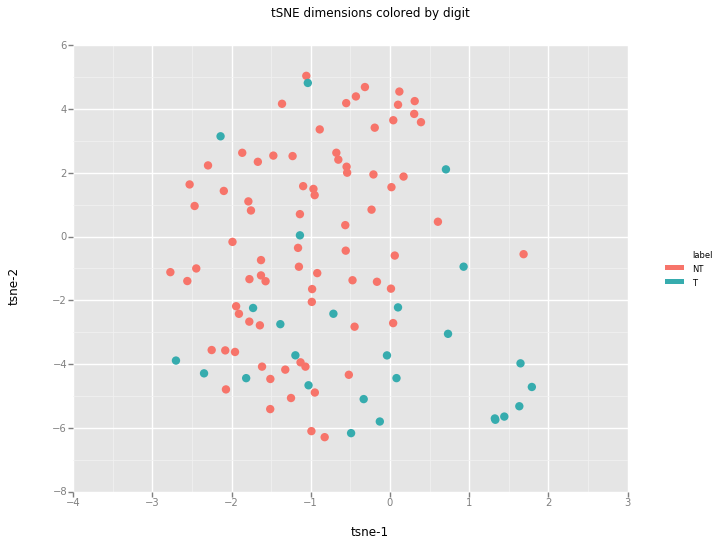

<ggplot: (92622147427)>

In [207]:
df_tsne2 = X.copy()
df_tsne2['tsne-1'] = tsne_results[:,0]
df_tsne2['tsne-2'] = tsne_results[:,1]
df_tsne2['label'] = y

chart = ggplot( df_tsne2, aes(x='tsne-1', y='tsne-2', color='label') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

In [23]:
def generate_pca(X, y, cols, n_components, **kwargs):
    pca = PCA(n_components)
    pca_result = pca.fit_transform(X)
    pca_df = pd.DataFrame(pca_result, columns=cols, index=X.index)
    pca_df['label'] = y
    pca_plot = ggplot(pca_df, aes(x="PCA-1", y="PCA-2", color='label') ) \
        + geom_point(size=100,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by class")
    return pca_plot

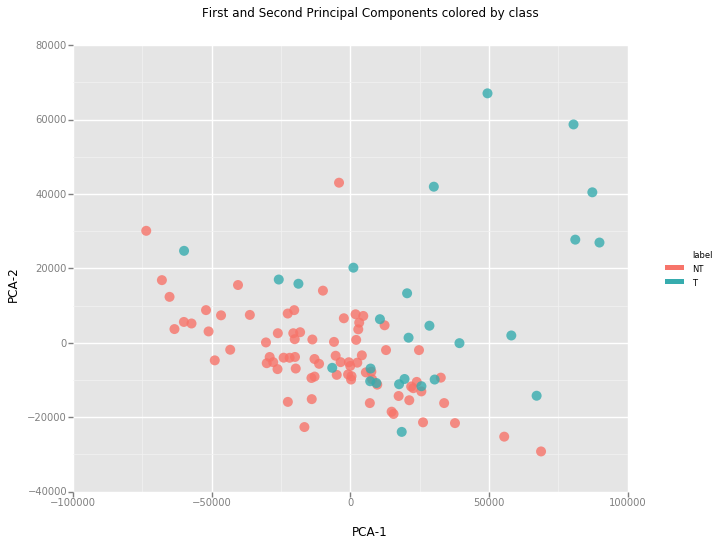

<ggplot: (133387297863)>

In [25]:
generate_pca(X, y, cols=["PCA-1", "PCA-2", "PCA-3"], n_components=3)